**Crop Production Analysis in India**


In [108]:
# importing lebraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
from mpl_toolkits import mplot3d

In [110]:
# load dataset :
df= pd.read_csv("/content/Crop Production data.csv")

Creating of all in the dataframe

In [111]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [112]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


Checking the datatypes of the columns in the dataframe

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


Creting new column name "Date" having the datatype of date



In [114]:
df["Date"] = pd.to_datetime(df["Crop_Year"], format='%Y')

In [115]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Date
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2000-01-01
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01


All Unique State Name

In [116]:
unique_State_Name =df["State_Name"].unique()
print(unique_State_Name)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [117]:
unique_Date =df["Date"].unique()
print(unique_Date)

<DatetimeArray>
['2000-01-01 00:00:00', '2001-01-01 00:00:00', '2002-01-01 00:00:00',
 '2003-01-01 00:00:00', '2004-01-01 00:00:00', '2005-01-01 00:00:00',
 '2006-01-01 00:00:00', '2010-01-01 00:00:00', '1997-01-01 00:00:00',
 '1998-01-01 00:00:00', '1999-01-01 00:00:00', '2007-01-01 00:00:00',
 '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2011-01-01 00:00:00',
 '2012-01-01 00:00:00', '2013-01-01 00:00:00', '2014-01-01 00:00:00',
 '2015-01-01 00:00:00']
Length: 19, dtype: datetime64[ns]


In [118]:
df["Season"]= df["Season"].str.strip()


In [119]:
unique_Season = df["Season"].unique()
print(unique_Season)

['Kharif' 'Whole Year' 'Autumn' 'Rabi' 'Summer' 'Winter']


Categorizing the 6 Season into 4 major Indian cropping Seasion

In [120]:
df["Season"] = df["Season"].apply(lambda x : "Rabi" if x == "Winter" else x )
df["Season"] =df["Season"].apply(lambda x : "Rabi" if x == "Autumn" else x )
df["Season"] = df["Season"].apply(lambda x : "Zaid" if x == "Summer" else x )
print(df["Season"].unique())


['Kharif' 'Whole Year' 'Rabi' 'Zaid']


*All unique crop names*

In [121]:
df["Crop"] =df["Crop"].str.strip()
unique_Crop = df["Crop"].unique()
print(unique_Crop)

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut'
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'
 

Since many of the crop names wre repleted  , duplicate or having wrong spelling .Comabing all the duplicate into one crop and correcting the spelling of all the incoorect ones .

In [122]:
df["Crop"] = df["Crop"].apply(lambda x : "Seasum" if x == "Sesamum" else x )
df["Crop"] =df["Crop"].apply(lambda x : "Pomegranete" if x == "Pome Granet" else x )
df["Crop"] = df["Crop"].apply(lambda x : "Sunhemp" if x == "Sannhamp" else x )
df["Crop"] = df["Crop"].apply(lambda x : "Raddish" if x == "Redish" else x )
df["Crop"] =df["Crop"].apply(lambda x : "Soybean" if x == "Soyabean" else x )
df["Crop"] = df["Crop"].apply(lambda x : "Snake Gourd" if x == "Sank Guard" else x )
df["Crop"] = df["Crop"].apply(lambda x : "Pumpkin" if x == "Pump kin" else x )
df["Crop"] =df["Crop"].apply(lambda x : "Paddy" if x == "Rice" else x )
df["Crop"] = df["Crop"].apply(lambda x : "Blackgram" if x == "Urad" else x )
df["Crop"] = df["Crop"].apply(lambda x : "Lentil" if x == "Masoor" else x )
df["Crop"] =df["Crop"].apply(lambda x : "Jute & mesta" if x == "Jute" else x )
df["Crop"] = df["Crop"].apply(lambda x : "Jute & mesta" if x == "Mesta" else x )
df["Crop"] = df["Crop"].apply(lambda x : "Cotton(lint)" if x == "Kapas" else x )

In [123]:
def category_name(name):

  Cereals = ['Wheat", "Maize', 'Bajra', 'Paddy', 'Jowar', 'Korra', 'Ragi', 'Small millets', 'Samai', 'Varagu', 'Barley', 'Khesari', 'Other Cereals & Millets']
  Pulses = ['Pulses total', 'Other Rabi pulses', 'Other Kharif pulses', 'Moong (Green Gram)', 'Blackgram', 'Lentil', 'Arhar/Tur', 'Horse-gram', 'Gram']
  Vegetables = ['Beans & Mutter (Vegetable)' , 'Lemon', 'Sweet potato', 'Tapioca', 'Onion', 'Potato', 'Bhindi ', 'Brinjal', 'Cucumber', 'Other Vegetables', 'Tomate Fruits']
  Fruits = ['Sapota', 'Banana', 'Citrus Fruit', 'Grapes', 'Mango', 'Orange', 'Other Fresh Fruits', 'Papaya', 'Pome Fruit', 'Pomegranate', 'Pineapple', 'Other Cit Oilseeds']
  Oilseeds=['other oilseeds', 'Groundnut', 'Sunflower', 'Castor seed', 'Safflower', 'Linseed', 'Seasum', 'Rapeseed &Mustard', 'Niger seed', 'Oilseeds total']
  Condiments = ['Dry ginger', 'Black pepper', 'Dry chillies', 'Turmeric', 'Coriander', 'Garlic', 'Ginger', 'Cond-spcs other', 'Cardamom', 'Arcanut (Processed)']
  Dryfruits = ['Cashewnut', 'Cashewnut Processed', 'Cashewnut Raw', 'Other Dry Fruit']
  Plantation = ['Coconut', 'Sugarcane', 'Cotton(lint)', 'Tobacco', 'Jute & mesta', 'Guar seed', 'Rubber', 'Tea', 'Coffee', 'other fibres']

  if name in Cereals:
                return 'Cereals'

  elif name in Pulses:
                return 'Pulses'

  elif name in Vegetables:
                return 'Vegetables'

  elif name in Fruits:
                return 'Fruits'

  elif name in Oilseeds:
                return 'Oilseeds'

  elif name in Condiments:
                return 'Condiments'

  elif name in Dryfruits:
                return 'Dryfruits'

  elif name in Plantation:
                return 'Plantation'

  else:
                return 'None'

df["Category"]= df["Crop"].apply(category_name)

print(df["Category"].unique())


['None' 'Pulses' 'Cereals' 'Fruits' 'Dryfruits' 'Plantation' 'Condiments'
 'Vegetables' 'Oilseeds']


Categorizing all the indian states into their respected regions

In [124]:
def category (name):

   east_india=['West Bengal', 'Tripura', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Odisha']
   west_india=['Maharashtra', 'Gujarat', 'Dadra and Nagar Haveli', 'Goa', 'Rajasthan']
   north_india=['Bihar', 'Chandigarh', 'Chhattisgarh', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Madhya Pradesh', 'Punjab','Telangana ', 'Uttar Pradesh', 'Uttarakhand']
   south_india = ['Tamil Nadu', 'Telangana', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry']

   if name in east_india:
    return 'East India'

   elif name in west_india:
    return 'West India'

   elif name in north_india:
    return 'North India'

   elif name in south_india:
    return 'South India'

   else:
    return 'None'

df["Region"] = df["State_Name"].apply(category)

print(df["Region"].unique())


['South India' 'East India' 'North India' 'West India' 'None']


In [125]:
ny_df = df.loc[df['Region'] == 'None']

ny_df["State_Name"].unique()

array(['Jammu and Kashmir '], dtype=object)

In [126]:
df.columns=['State_Name',	'District_Name',	'Crop_Year',	'Season',	'Crop',	'Area(hectare)',	'Production(tonnes)',	'Date',	'Category',	'Region']

In [127]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region'],
      dtype='object')

Creating  a new columns named "productivity" and "Total productivity"

In [128]:
df["Productivity"] = df ["Production(tonnes)"] / df["Area(hectare)"]
df["Total Production"] = df ["Production(tonnes)"] * df["Area(hectare)"]

In [129]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area(hectare),Production(tonnes),Date,Category,Region,Productivity,Total Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01,None,South India,1.594896,2508000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01,Pulses,South India,0.500000,2.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Paddy,102.0,321.0,2000-01-01,Cereals,South India,3.147059,32742.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01,Fruits,South India,3.642045,112816.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01,Dryfruits,South India,0.229167,118800.0


Droping All the null values :

In [130]:
df = df.dropna(axis=0)

Droping All the rows in which Area is 1,2,3,4,5,6,7
 and 10


In [131]:
df = df.drop(df[df['Area(hectare)'] ==1].index)
df = df.drop(df[df['Area(hectare)'] ==7].index)
df = df.drop(df[df['Area(hectare)'] ==2].index)
df = df.drop(df[df['Area(hectare)'] ==3].index)
df = df.drop(df[df['Area(hectare)'] ==4].index)
df = df.drop(df[df['Area(hectare)'] ==5].index)
df = df.drop(df[df['Area(hectare)'] ==6].index)
df = df.drop(df[df['Area(hectare)'] ==10].index)



Droping All the rows in which production is 0,1,2,3,4,5,6 and 10



In [132]:
df = df.drop(df[df['Production(tonnes)'] ==0].index)
df = df.drop(df[df['Production(tonnes)'] ==1].index)
df = df.drop(df[df['Production(tonnes)'] ==2].index)
df = df.drop(df[df['Production(tonnes)'] ==3].index)
df = df.drop(df[df['Production(tonnes)'] ==4].index)
df = df.drop(df[df['Production(tonnes)'] ==5].index)
df = df.drop(df[df['Production(tonnes)'] ==6].index)
df = df.drop(df[df['Production(tonnes)'] ==10].index)

In [133]:
df.to_csv("Clened.csv", index = False)

In [134]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

Removing the outliers

In [135]:
Q1= df["Total Production"].quantile(0.40)
Q3 =df["Total Production"].quantile (0.60)
IQR = Q3 - Q1
df =df[(df["Total Production"] >= Q1-1.5*IQR) & (df ["Total Production"] <= Q3 + 1.5*IQR)]

In [136]:
Q1 =df ["Productivity"].quantile (0.40)
Q3 =df["Productivity"].quantile (0.60)

IQR= Q3-Q1

df=df[(df["Productivity"] >= Q1 -1.5*IQR) & (df ["Productivity"] <= Q3 + 1.5*IQR)]

(array([76741.,  7248.,  3958.,  2710.,  2058.,  1754.,  1335.,  1186.,
         1125.,   919.]),
 array([8.00000000e-03, 1.00686001e+06, 2.01372001e+06, 3.02058001e+06,
        4.02744000e+06, 5.03430000e+06, 6.04116000e+06, 7.04802000e+06,
        8.05488000e+06, 9.06174000e+06, 1.00686000e+07]),
 <BarContainer object of 10 artists>)

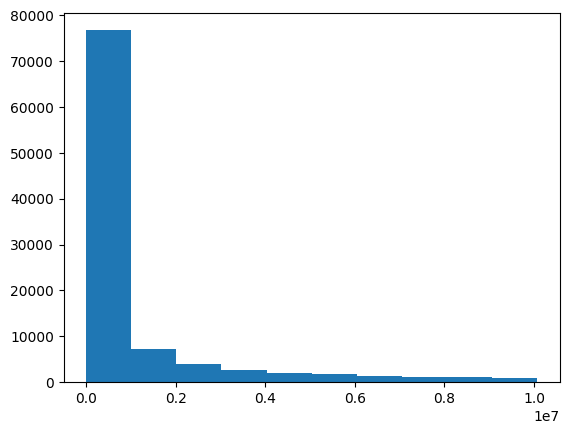

In [137]:
plt.hist(df["Total Production"])

(array([11984., 15434., 16307., 13256., 12632., 11263.,  6145.,  4620.,
         4457.,  2936.]),
 array([0.13772455, 0.29021349, 0.44270244, 0.59519138, 0.74768032,
        0.90016927, 1.05265821, 1.20514715, 1.3576361 , 1.51012504,
        1.66261398]),
 <BarContainer object of 10 artists>)

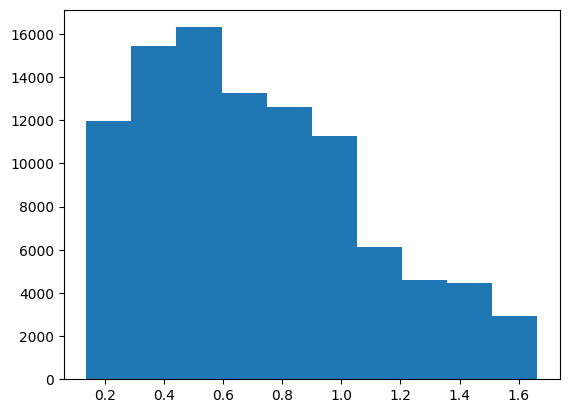

In [138]:
plt.hist(df["Productivity"])

In [139]:
df.to_csv("CleanedIQR.csv", index = False)

In [140]:
Q1= df["Area(hectare)"].quantile(0.40)
Q3 =df["Area(hectare)"].quantile (0.60)
IQR = Q3 - Q1
df =df[(df["Area(hectare)"] >= Q1-1.5*IQR) & (df ["Area(hectare)"] <= Q3 + 1.5*IQR)]

In [141]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

(array([27911., 12570.,  8176.,  5733.,  4528.,  3889.,  3174.,  3209.,
         2795.,  2301.]),
 array([1.00000e-01, 1.12790e+02, 2.25480e+02, 3.38170e+02, 4.50860e+02,
        5.63550e+02, 6.76240e+02, 7.88930e+02, 9.01620e+02, 1.01431e+03,
        1.12700e+03]),
 <BarContainer object of 10 artists>)

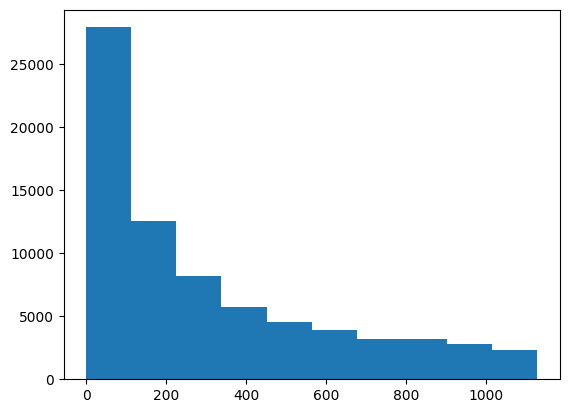

In [142]:
plt.hist(df["Area(hectare)"])

In [143]:
df.to_csv("CleanedIQR.csv", index = False)